In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import expm

In [2]:
# J_IX = -0.21*1e6
# J_IY = -1.68*1e6
# J_IZ =  0.20*1e6
# J_ZX = 10.47*1e6
# J_ZY =  1.50*1e6
# J_ZZ = -0.86*1e6

In [3]:
# J_IX = 58.47*1e6
# J_IY =  3.68*1e6
# J_IZ = -5.00*1e6
# J_ZX = 10.76*1e6
# J_ZY =  2.29*1e6
# J_ZZ = -0.52*1e6

In [4]:
J_IX = -8.52*1e6
J_IY = -2.15*1e6
J_IZ = -0.26*1e6
J_ZX = 10.93*1e6
J_ZY =  0.85*1e6
J_ZZ =  0.32*1e6

In [5]:
# J_IX =  9.42*1e6
# J_IY = -0.71*1e6
# J_IZ =  0.27*1e6
# J_ZX = 12.21*1e6
# J_ZY = -0.71*1e6
# J_ZZ = -0.25*1e6

In [6]:
def zero_padding(t, p, n_pad):
    t_max = np.max(t)
    t_min = np.min(t)
    n_t = len(t)
    del_t = t[1]-t[0]
    t_pad = np.linspace(t_min, t_max+n_pad*del_t, len(t)+n_pad)
    p_pad = np.pad(p, (0, n_pad))
    return t_pad, p_pad

In [7]:
path = "C:\\Arbeit\\MasterArbeit\\echo_cr_tomography\\FakeAthenSimulation\\experiment_data\\single\\c1t0_04amp_04sig\\"
data_x = pd.read_csv(path+"full_U0_M0.csv", index_col=0)
data_y = pd.read_csv(path+"full_U0_M1.csv", index_col=0)
data_z = pd.read_csv(path+"full_U0_M2.csv", index_col=0)
dt = 2.2222222222222221e-10
exp_t = data_z["t"]*dt
exp_px = data_x["count"]
exp_py = data_y["count"]
exp_pz = data_z["count"]

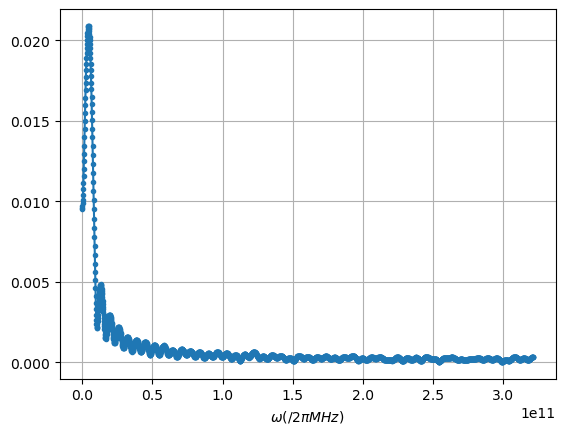

4.409517988833826


In [8]:
from scipy.fft import fft, fftfreq
t_max = 10*1e-7
t_intp = np.linspace(0, t_max, 105)[1:]#  !Important, endpoint= False
p_intp = np.interp(t_intp, exp_t, exp_pz)
# Number of sample points
N_pad = 5000
t_pad, p_pad = zero_padding(exp_t, exp_pz, n_pad =N_pad)
# sample spacing
N = len(t_pad)
T = t_pad[1]-t_pad[0]
x = np.linspace(0.0, N*T, N, endpoint=False)
fft_p = np.abs(fft(p_pad)[0:N//2])
xf = fftfreq(N, T)[:N//2]
f0 = xf[np.where(fft_p==np.max(fft_p))[0]][0]*2*np.pi

# plt.plot(xf*2*np.pi*1e3, 2.0/N *yx, ".-")
plt.plot(xf*2*np.pi*1e3, 2.0/N *fft_p, ".-")
# plt.vlines(f1*2*np.pi, 0, 0.1)
# plt.legend()
plt.xlabel(r"$\omega(/2\pi MHz)$")
# plt.xlim(-1,0.1e13)
plt.grid()
plt.show()
print(f0/1e6)

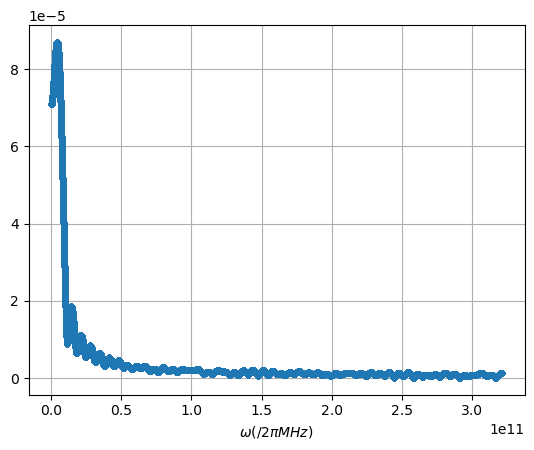

4.16811736689095


In [9]:
N_pad = int(1e6)
t_pad, p_pad = zero_padding(exp_t, exp_px, n_pad =N_pad)
# sample spacing
N = len(t_pad)
T = t_pad[1]-t_pad[0]
x = np.linspace(0.0, N*T, N, endpoint=False)
fft_p = np.abs(fft(p_pad)[0:N//2])
xf = fftfreq(N, T)[:N//2]
fx0 = xf[np.where(fft_p==np.max(fft_p))[0]][0]*2*np.pi

# plt.plot(xf*2*np.pi*1e3, 2.0/N *yx, ".-")
plt.plot(xf*2*np.pi*1e3, 2.0/N *fft_p, ".-")
# plt.vlines(f1*2*np.pi, 0, 0.1)
# plt.legend()
plt.xlabel(r"$\omega(/2\pi MHz)$")
# plt.xlim(-1,0.1e13)
plt.grid()
plt.show()
print(fx0/1e6)

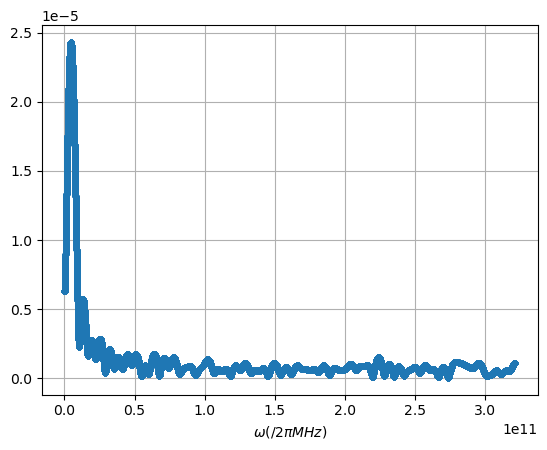

4.569701050304984


In [10]:
N_pad = int(1e6)
t_pad, p_pad = zero_padding(exp_t, exp_py, n_pad =N_pad)
# sample spacing
N = len(t_pad)
T = t_pad[1]-t_pad[0]
x = np.linspace(0.0, N*T, N, endpoint=False)
fft_p = np.abs(fft(p_pad)[0:N//2])
xf = fftfreq(N, T)[:N//2]
fy0 = xf[np.where(fft_p==np.max(fft_p))[0]][0]*2*np.pi

# plt.plot(xf*2*np.pi*1e3, 2.0/N *yx, ".-")
plt.plot(xf*2*np.pi*1e3, 2.0/N *fft_p, ".-")
# plt.vlines(f1*2*np.pi, 0, 0.1)
# plt.legend()
plt.xlabel(r"$\omega(/2\pi MHz)$")
# plt.xlim(-1,0.1e13)
plt.grid()
plt.show()
print(fy0/1e6)

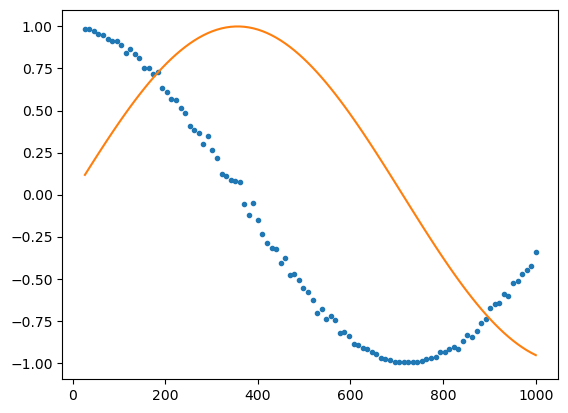

In [11]:
plt.plot(exp_t*1e9, exp_pz, ".")
plt.plot(exp_t*1e9, np.sin(f0*exp_t))

In [12]:
a0 = J_IZ+J_ZZ
b0 = J_IX+J_ZX+1j*(J_IY+J_ZY)
a1 = J_IZ-J_ZZ
b1 = J_IX-J_ZX+1j*(J_IY-J_ZY)

N = 50
t = np.linspace(0, 6e-7, N)#

def p_x(a, be, phi, mu, t):
    return -a*np.abs(be)/mu**2*np.cos(phi)*(1-np.cos(2*mu*t))-np.abs(be)/mu*np.sin(phi)*np.sin(2*mu*t)

def p_y(a, be, phi, mu, t):
    return -a*np.abs(be)/mu**2*np.sin(phi)*(1-np.cos(2*mu*t))-np.abs(be)/mu*np.cos(phi)*np.sin(2*mu*t)

def p_z(a, be, phi, mu, t):
    return a**2/mu**2+np.abs(be)**2/mu**2*np.cos(2*mu*t)

In [13]:
phi0 = np.angle(a0-1j*np.abs(b0))
mu0 = np.sqrt(a0**2+np.abs(b0)**2)


px0 = p_x(a0, b0, phi0, mu0,t)
py0 = p_y(a0, b0, phi0, mu0,t)
pz0 = p_z(a0, b0, phi0, mu0,t)


phi1 = np.angle(a1-1j*np.abs(b1))
mu1 = np.sqrt(a1**2+np.abs(b1)**2)


px1 = p_x(a1,b1, phi1,mu1,t)
py1 = p_y(a1,b1, phi1,mu1,t)
pz1 = p_z(a1,b1, phi1,mu1,t)

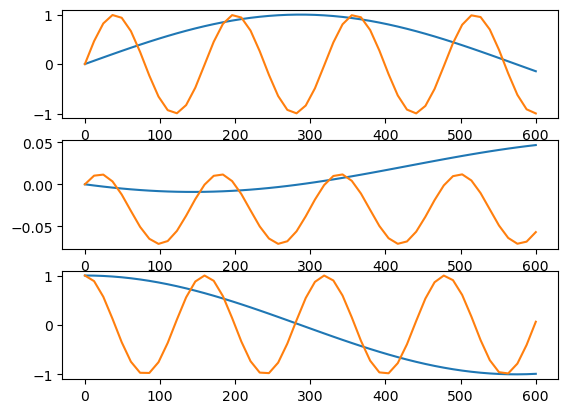

In [14]:

plt.subplot(3, 1, 1)
plt.plot(t*1e9, px0)
plt.plot(t*1e9, px1)
plt.subplot(3, 1, 2)
plt.plot(t*1e9, py0)
plt.plot(t*1e9, py1)
# plt.ylim(-0.01,0.01)
plt.subplot(3, 1, 3)
plt.plot(t*1e9, pz0)
plt.plot(t*1e9, pz1)

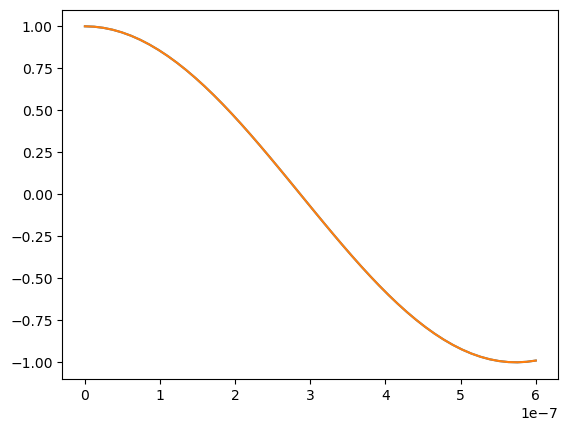

In [15]:
from scipy.optimize import minimize

def p_z_fit(t, mu, a):
    # mu=f0*2*np.pi
    a = a*1e6
    return a**2/mu**2*np.cos(2*mu*t)+(1-(a/mu)**2)


def loss_optimizer(lam, t, p, func):
        return np.mean((p-func(t, *lam))**2)
    #
# result = minimize(loss_optimizer, x0=(mu0, 0.96), args=(t, pz0, p_z_fit), method="L-BFGS-B")
result = minimize(loss_optimizer, x0=(mu0, 0.06), args=(t, pz0, p_z_fit), method="L-BFGS-B")
# # 
plt.plot(t, p_z_fit(t, *result.x))
plt.plot(t, p_z(a0,b0,phi0,mu0,t))

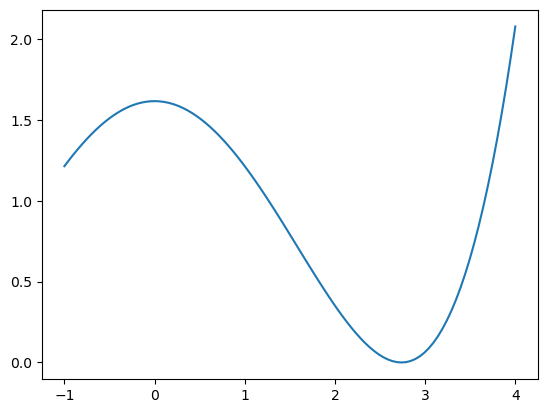

In [16]:
N_a = 100
As = np.linspace(-1, 4,N_a)
Aloss = np.array([loss_optimizer([mu0*1, A_i], t, pz0, p_z_fit) for A_i in As])
plt.plot(As, Aloss)

In [17]:
B_r = a0**2/mu0**2 
A_r = np.abs(b0)**2/mu0**2

In [18]:
b= result.x[1]
# B = result.x[1]
a = np.sqrt(1-(b*1e6/mu0)**2)*mu0

In [19]:
b, np.abs(b0)/1e6

(2.7382657468021914, 2.7382658746002004)

In [20]:
a/1e6, a0/1e6

(0.06000583213187475, 0.06)

In [21]:
alpha = -a*np.abs(b*1e6)/mu0**2
beta = -np.abs(b*1e6)/mu0


def p_x_fit(t, mu, phi):
    # mu=f0*2*np.pi
    return alpha*np.cos(phi)*(1-np.cos(2*mu*t))+beta*np.sin(phi)*np.sin(2*mu*t)

def p_y_fit(t, mu, phi):
    # mu=f0*2*np.pi
    return alpha*np.sin(phi)*(1-np.cos(2*mu*t))+beta*np.cos(phi)*np.sin(2*mu*t)

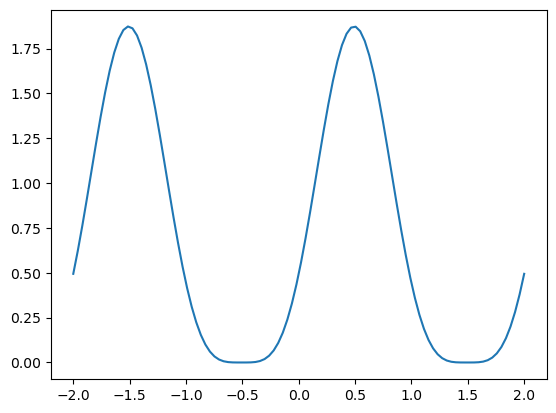

In [22]:
N_phi = 100
phis = np.linspace(-2*np.pi, 2*np.pi, N_phi)
philoss = np.array([loss_optimizer([mu0*1, phi_i], t, px0, p_x_fit) for phi_i in phis])
plt.plot(phis/np.pi, philoss)

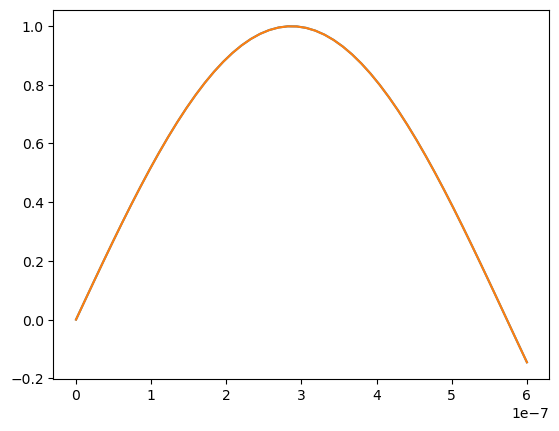

In [23]:
result = minimize(loss_optimizer, x0=(mu0, -np.pi), args=(t, px0, p_x_fit), method="L-BFGS-B")

plt.plot(t, p_x_fit(t, *result.x))
plt.plot(t, p_x(a0, b0, phi0, mu0, t))

In [24]:
result.x, mu0, phi0

(array([ 2.73892315e+06, -1.55191304e+00]),
 2738923.1460557636,
 -1.5488881545866753)

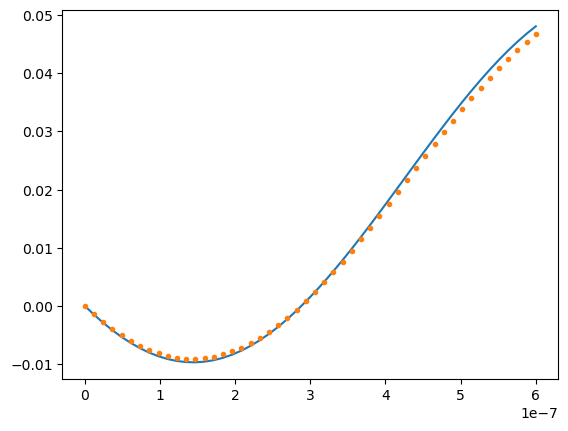

In [25]:
result = minimize(loss_optimizer, x0=(mu0*1.02, -0.1), args=(t, py0, p_y_fit), method="L-BFGS-B")

plt.plot(t, p_y_fit(t, *result.x))
plt.plot(t, py0, ".")

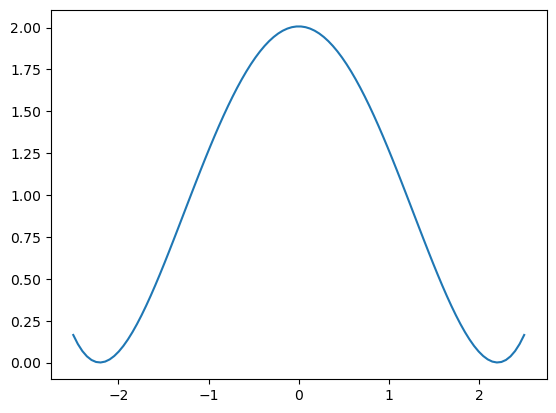

In [26]:
N_a = 100
As = np.linspace(-2.5, 2.5, N_a)
Aloss = np.array([loss_optimizer([f0/2, A_i], exp_t, exp_pz, p_z_fit) for A_i in As])
plt.plot(As, Aloss)

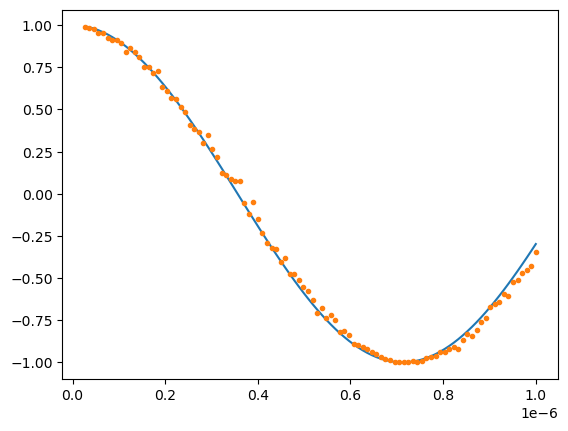

In [27]:
result = minimize(loss_optimizer, x0=(f0/2, 0.1), args=(exp_t, exp_pz, p_z_fit), method="L-BFGS-B")

plt.plot(exp_t, p_z_fit(exp_t, *result.x))
plt.plot(exp_t, exp_pz, ".")

In [28]:
b = result.x[1]
a = np.sqrt(1-(b*1e6/(f0/2))**2)*(f0/2)/1e6

In [29]:
a, b

(0.03769769734290512, 2.204436687019457)

In [30]:
a=a/f0*fx0
b=b/f0*fx0

alpha = -a*1e6*np.abs(b*1e6)/(fx0/2)**2
beta = -np.abs(b*1e6)/(fx0/2)


def p_x_fit(t, mu, phi):
    # mu=f0*2*np.pi
    return alpha*np.cos(phi)*(1-np.cos(2*mu*t))+beta*np.sin(phi)*np.sin(2*mu*t)

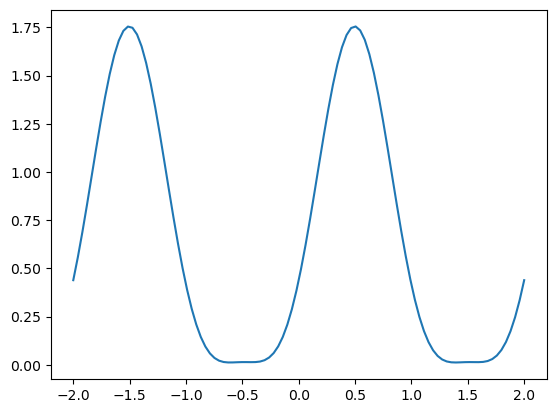

In [31]:
N_phi = 100
phis = np.linspace(-2*np.pi, 2*np.pi, N_phi)
philoss = np.array([loss_optimizer([fx0/2, phi_i], exp_t, exp_px, p_x_fit) for phi_i in phis])
plt.plot(phis/np.pi, philoss)

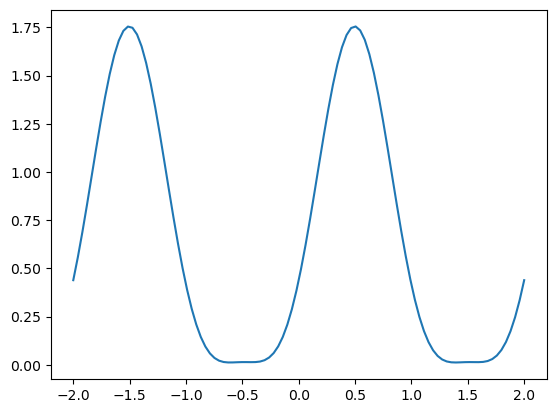

In [32]:
N_phi = 100
phis = np.linspace(-2*np.pi, 2*np.pi, N_phi)
philoss = np.array([loss_optimizer([fx0/2, phi_i], exp_t, exp_px, p_x_fit) for phi_i in phis])
plt.plot(phis/np.pi, philoss)

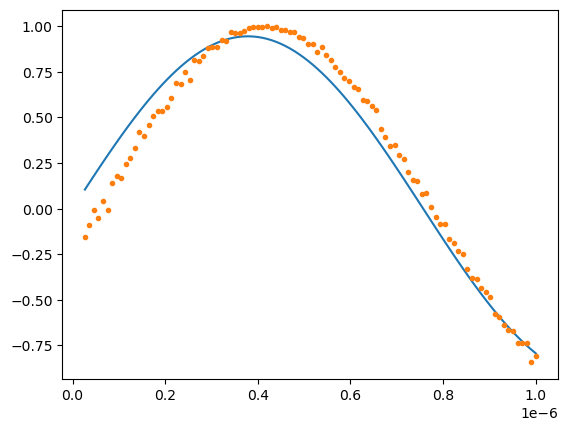

In [33]:
result = minimize(loss_optimizer, x0=(fx0/2, -np.pi), args=(exp_t, exp_px, p_x_fit), method="L-BFGS-B")

plt.plot(exp_t, p_x_fit(exp_t, *result.x))
plt.plot(exp_t, exp_px, ".")

In [34]:
a=a/fx0*fy0
b=b/fx0*fy0


alpha = -a*1e6*np.abs(b*1e6)/(fx0/2)**2
beta = -np.abs(b*1e6)/(fx0/2)

def p_y_fit(t, mu, phi):
    return alpha*np.sin(phi)*(1-np.cos(2*mu*t))+beta*np.cos(phi)*np.sin(2*mu*t)

In [38]:
import numdifftools as nd
def func(x0):
    a = x0[0]
    b = x0[1]
    c = x0[2]
    return a+2*b**2

val  = nd.Jacobian(func)(np.array([0,2,2]))
np.linspace(0,8,9)[:1]

array([0.])

Text(0, 0.5, '$\\nu (\\pi)$')

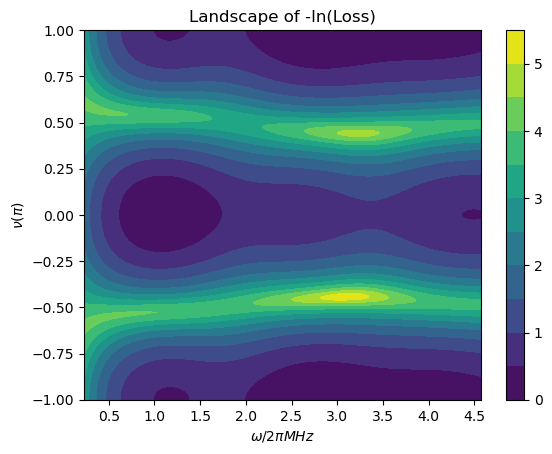

In [37]:
N_phi = 200
N_proc = 200
phis = np.linspace(-1*np.pi, 1*np.pi, N_phi)
proc = np.linspace(0.1, 2, N_proc)

philoss2d = np.zeros((N_phi,N_proc))

for i in range(N_phi):
    for j in range(N_proc):
        philoss2d[i,j] = loss_optimizer([fy0/2*proc[j], phis[i]], exp_t, exp_py, p_y_fit)

# philoss_f = np.array([loss_optimizer([fy0/2*i, phi0], exp_t, exp_py, p_y_fit) for i in proc])

plt.contourf(fy0/2*proc/1e6, phis/np.pi, -np.log(philoss2d), 10)
plt.colorbar()
plt.title("Landscape of -ln(Loss)")
plt.xlabel(r"$\omega /2\pi MHz$")
plt.ylabel(r"$\nu (\pi)$")
# np.min(philoss)

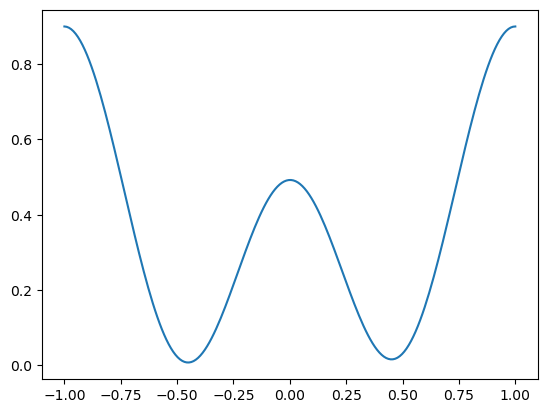

In [38]:
philoss = np.array([loss_optimizer([fy0/2*1.2, phi_i], exp_t, exp_py, p_y_fit) for phi_i in phis])
plt.plot(phis/np.pi, philoss)

In [39]:
np.min(philoss2d)
# result

0.0049361536391508845

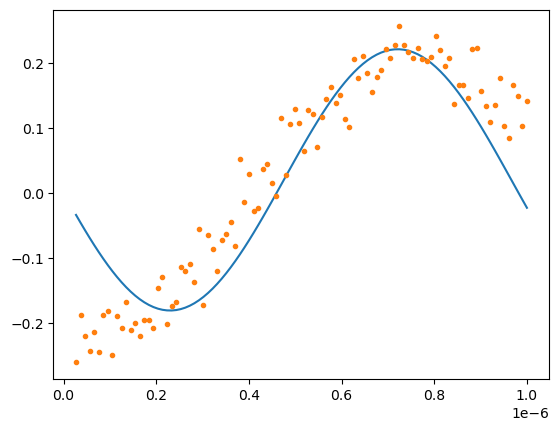

In [40]:
result = minimize(loss_optimizer, x0=(fy0/2*1.4, 0.1), args=(exp_t, exp_py, p_y_fit), method="L-BFGS-B")

plt.plot(exp_t, p_y_fit(exp_t, *result.x))
plt.plot(exp_t, exp_py, ".")

In [41]:
result.fun

0.0051073842994661936

In [40]:
f0/2, fy0*1.4/2

(2204758.994416913, 3198790.7352134893)